In [14]:
import ugradio #if remote git clone this module
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib notebook
import pandas as pd
from scipy.optimize import curve_fit
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['axes.titlesize'] = 18
mpl.rcParams['axes.labelsize'] = 16

# Experiment 1

## 5.2 Plots (From Aliased Data)

In [15]:
test_data = pd.read_csv('data/alias_data')

In [16]:
def volt_spec(sample):
    data = test_data[sample]
    fourier = ugradio.dft.dft(data, vsamp=1.024)
    return fourier

def power_spec(sample): #inputs: fgen freq, sample rate (must be strings)
    volt = volt_spec(sample)
    return volt[0], abs(volt[1])**2 #returns power spectrum of specified frequencies

In [17]:
#experimentation cell

titles = test_data.columns[1:7] #datatype is a pandas index with string values; can pull strings by indexing
times = np.array(range(len(test_data.loc[:, f'{titles[0]}']))) #initialize arbitrary numpy array to make up x-axis for plot
#normalize x-axis, sample rate of 1024 kHz and 2048 samples means sample taken every 2ms
times = 2*times

#r'Power Spectrum $(\nu = 100 kHz, \nu_s ='+titles[k][5:]+'kHz)$'
#times = range(len(test_data.loc[:, f'{titles[0]}']))
titles

Index(['data', 'data2', 'data3', 'data4', 'data5', 'data6'], dtype='object')

<IPython.core.display.Javascript object>


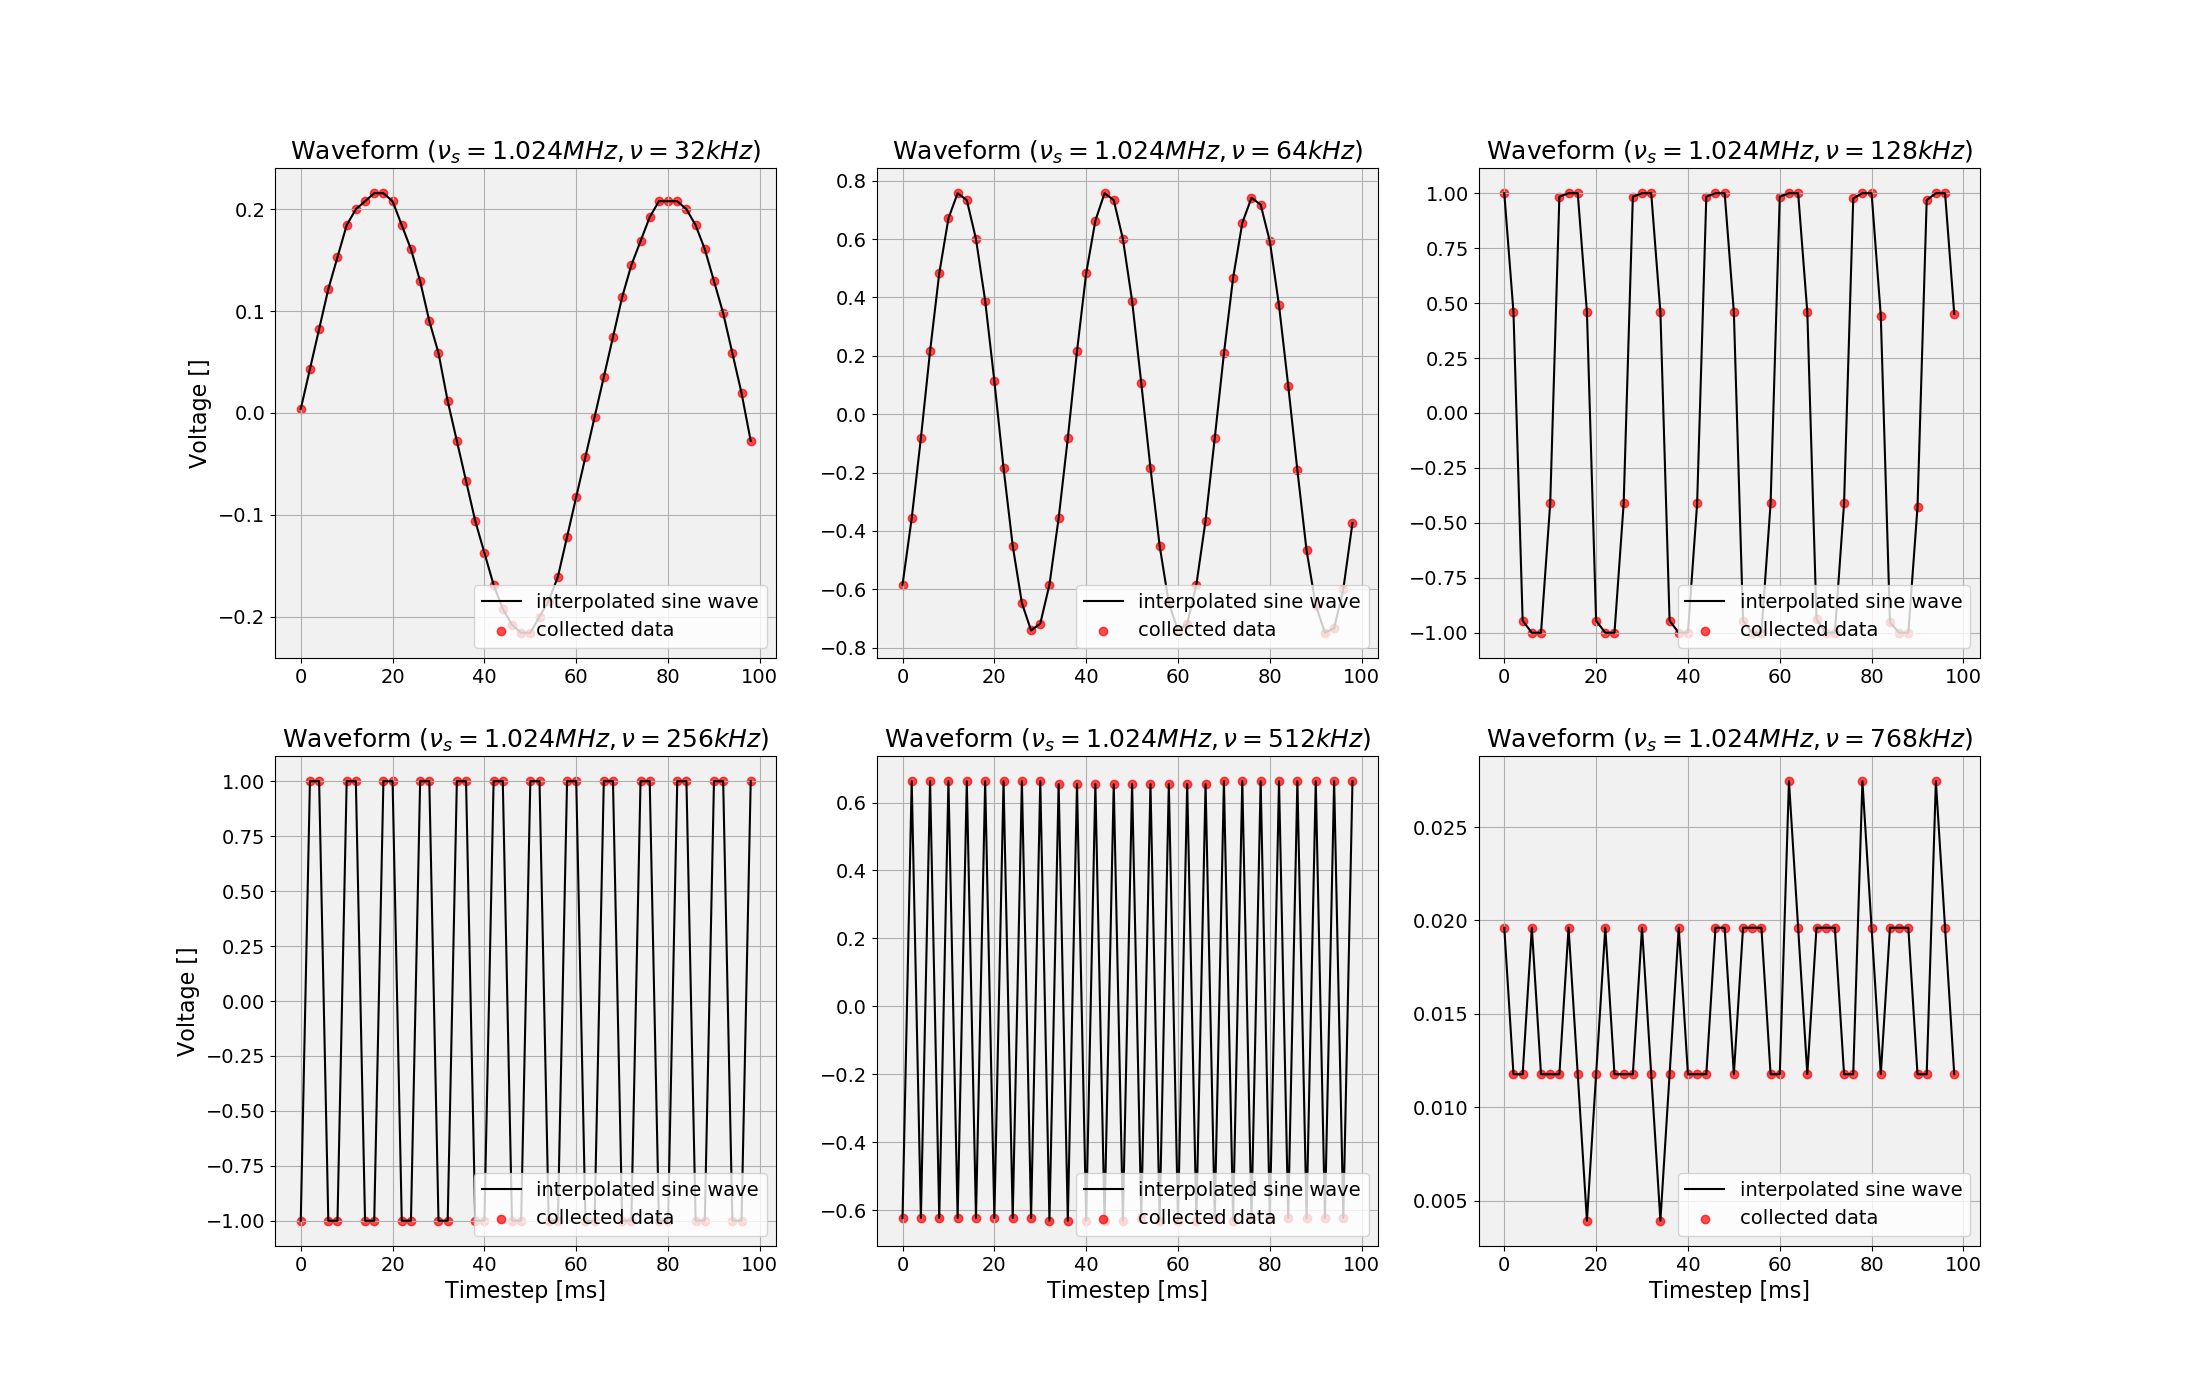

In [19]:
fig, axes = plt.subplots(2, 3, figsize=(22, 14), squeeze=True, facecolor = 'white')
plt.title('Power Spectra')

# alias_data doesn't have the naming scheme as data used for this code so need a list of frequencies used
freq = [32, 64, 128, 256, 512, 768]

for i, vax in enumerate(axes):
    for j, hax in enumerate(vax):
        k = 3*i + j
        hax.set_title(r'Waveform $(\nu_s = 1.024 MHz, \nu ='+str(freq[k])+'kHz)$')
        hax.plot(times[:50], test_data.loc[:, f'{titles[k]}'][:50], color = 'k', label='interpolated sine wave')
        hax.scatter(times[:50], test_data.loc[:, f'{titles[k]}'][:50], color = 'red', marker = 'o', alpha = 0.7, label='collected data')
        #used blue-orange color scheme out of color-blindness considerations^
        hax.set_facecolor('#f1f1f1')
        if i == 1:
            hax.set_xlabel('Timestep [ms]')
        if j == 0:
            hax.set_ylabel(r'Voltage []')
        hax.grid()
        hax.legend(loc = 4, prop={'size': 14})

<IPython.core.display.Javascript object>


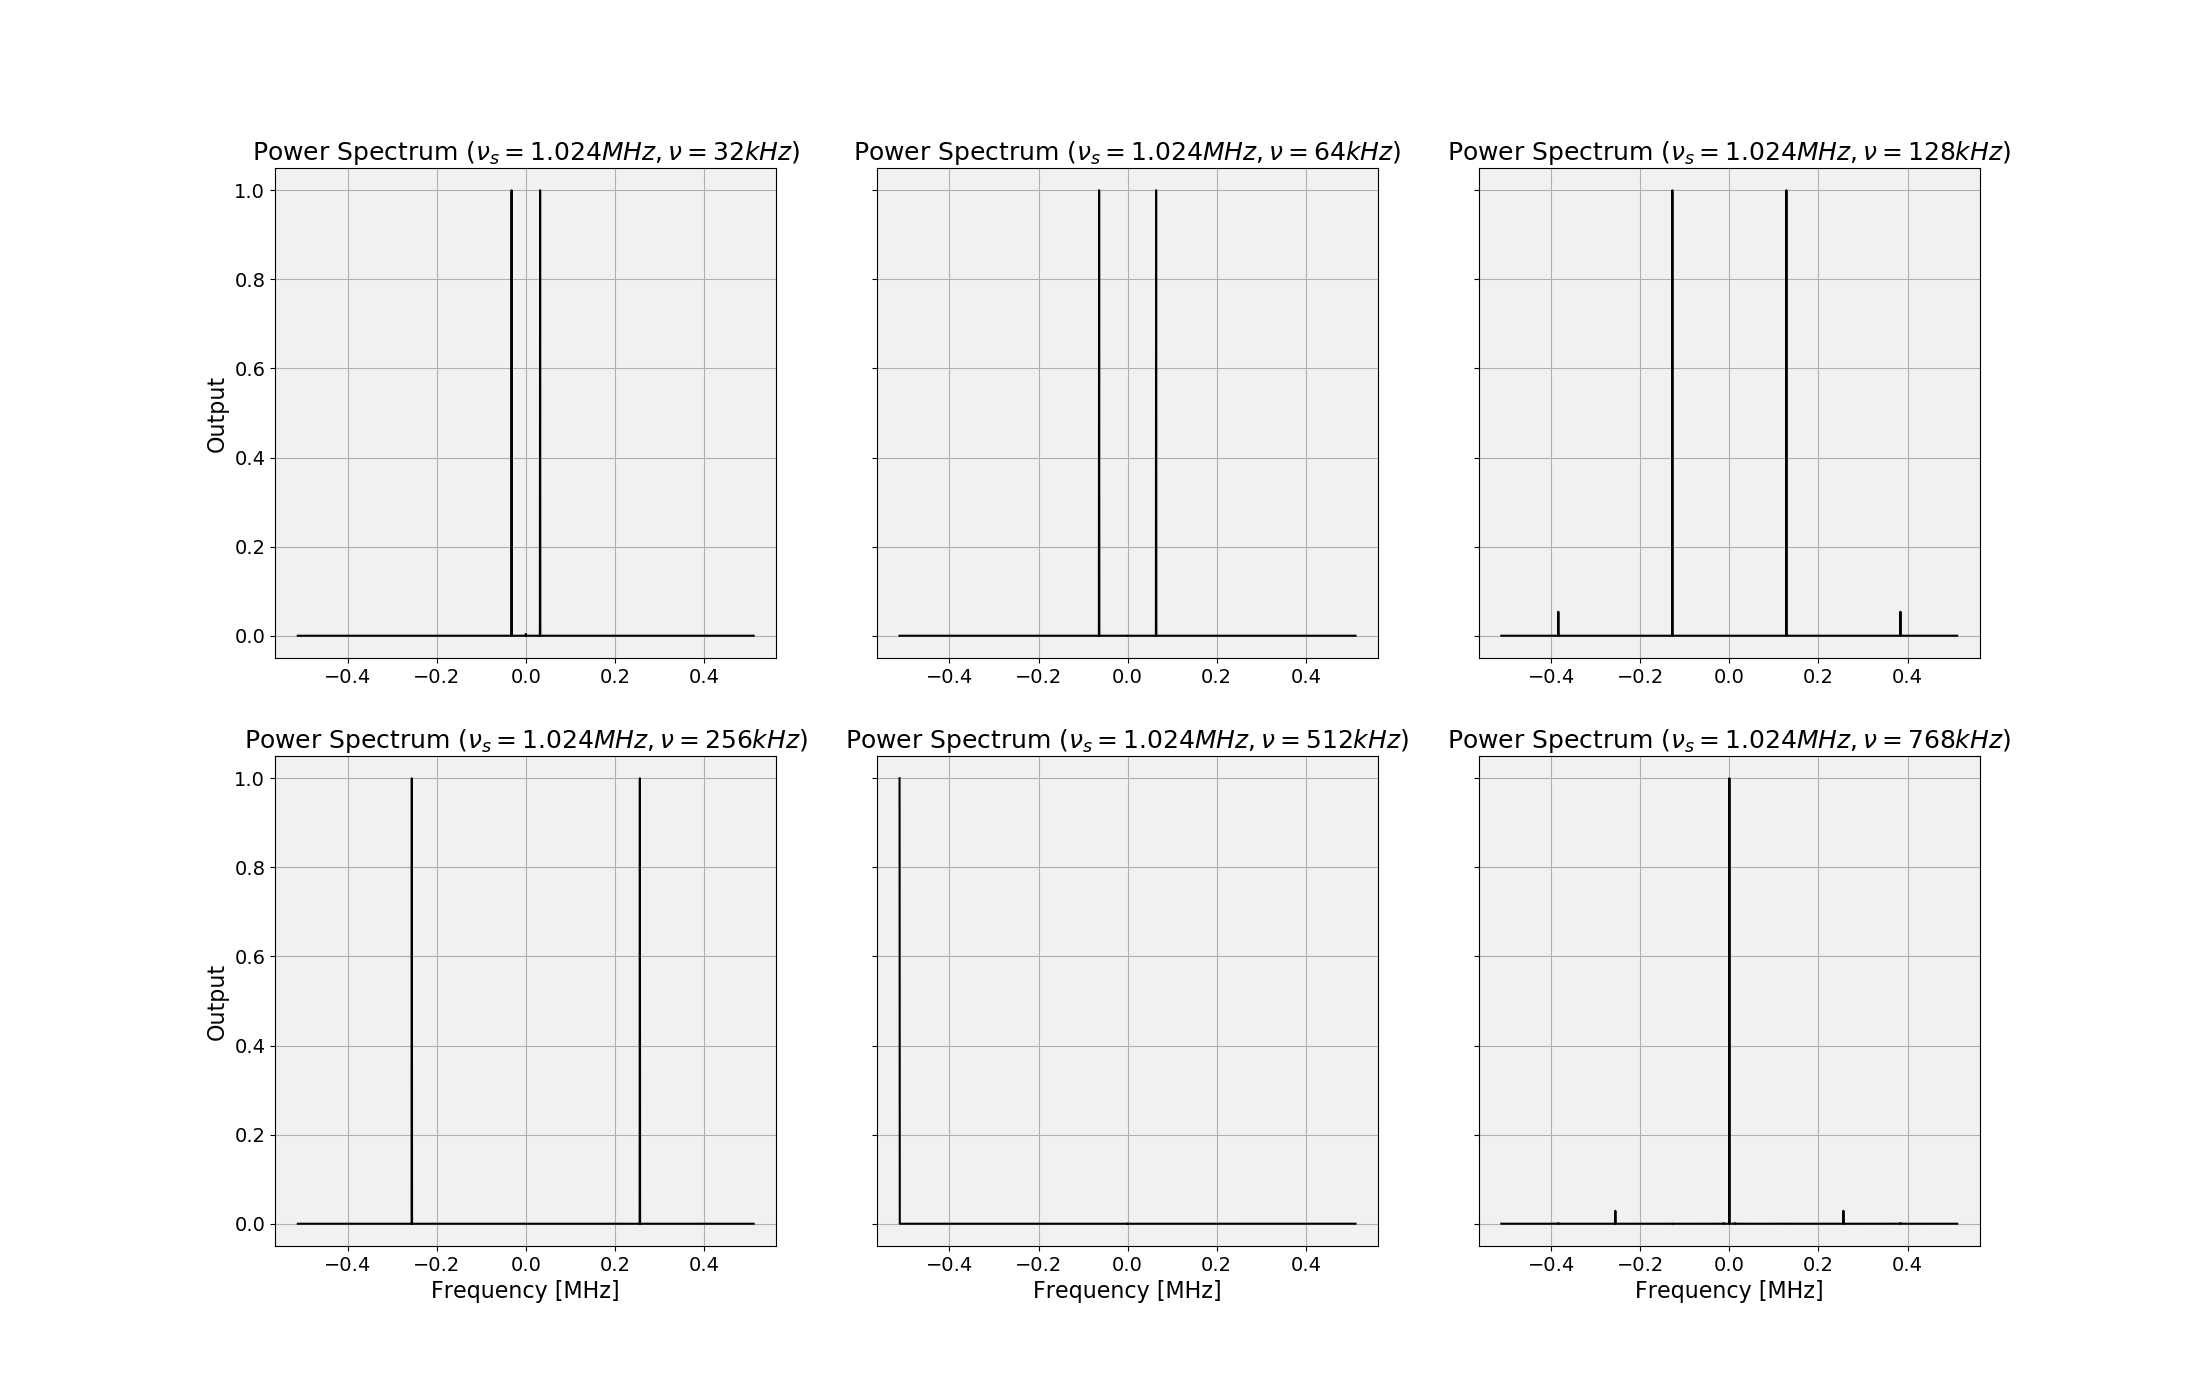

In [21]:
fig, axes = plt.subplots(2, 3, figsize=(22, 14), squeeze=True, facecolor = 'white', sharey=True)
plt.title('Power Spectra')

for i, vax in enumerate(axes):
    for j, hax in enumerate(vax):
        k = 3*i + j
        hax.set_title(r'Power Spectrum $(\nu_s = 1.024 MHz, \nu ='+str(freq[k])+'kHz)$')
        hax.plot(power_spec(f'{titles[k]}')[0], power_spec(f'{titles[k]}')[1].real/np.max(power_spec(f'{titles[k]}')[1].real), color = 'k', label='real')
        #used blue-orange color scheme out of color-blindness considerations^
        #hax.set_yscale('log') #comment this line out for linear scale
        hax.set_facecolor('#f1f1f1')
        if i == 1:
            hax.set_xlabel('Frequency [MHz]')
        if j == 0:
            hax.set_ylabel(r'Output')
        hax.grid()

## 5.5 Plots (Resolution)

In [22]:
res_data = pd.read_csv('data/res_data_013122')

data_10 = res_data['data_10']
data_4 = res_data['data_4']
data_1 = res_data['data_1']
data_05 = res_data['data_05']

In [25]:
def res_spec(sample):
    fourier = ugradio.dft.dft(sample, vsamp=2.2)
    power = np.abs(fourier[1])**2
    return fourier[0], power

<IPython.core.display.Javascript object>


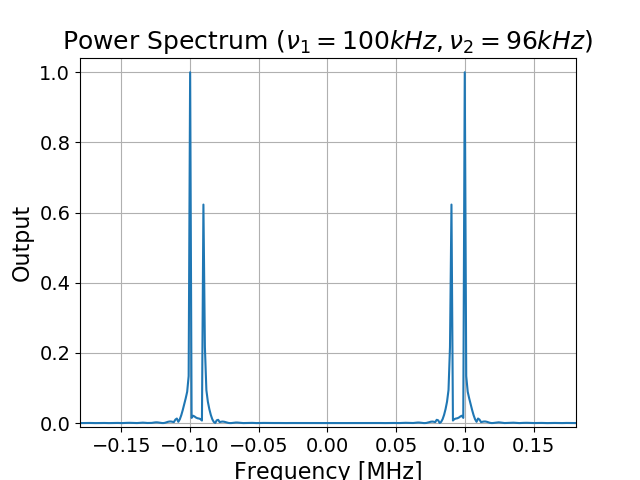

In [30]:
power_spec_4 = res_spec(data_4)
plt.figure()
plt.grid()
plt.title(r'Power Spectrum $(\nu_1 = 100 kHz, \nu_2 = 96 kHz)$')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Output')
plt.plot(power_spec_4[0], power_spec_4[1]/np.max(power_spec_4[1]))

<IPython.core.display.Javascript object>


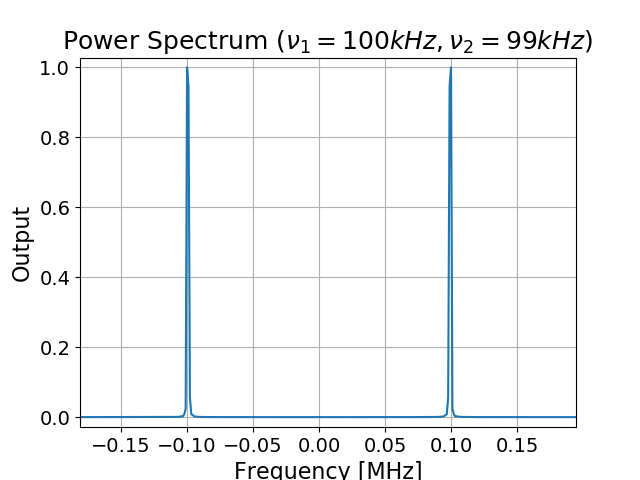

In [33]:
power_spec_1 = res_spec(data_1)
plt.figure()
plt.grid()
plt.title(r'Power Spectrum $(\nu_1 = 100 kHz, \nu_2 = 99 kHz)$')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Output')
plt.plot(power_spec_1[0], power_spec_1[1]/np.max(power_spec_1[1]))

# Experiment 2

## 5.4: Spectral Leakage

In [134]:
def new_power_spec(sample): #inputs: fgen freq, sample rate (must be strings)
    Nfreq=int(1*len(sample))
    volt = ugradio.dft.dft(
        sample,
        f=np.linspace(-1024/2.,1024/2.,num=Nfreq,endpoint=False),
        vsamp=1024
        )
    return volt[0], abs(volt[1])**2 #returns power spectrum of specified frequencies

In [135]:
spec_data = test_data['data']
power_data = new_power_spec(spec_data)

<IPython.core.display.Javascript object>


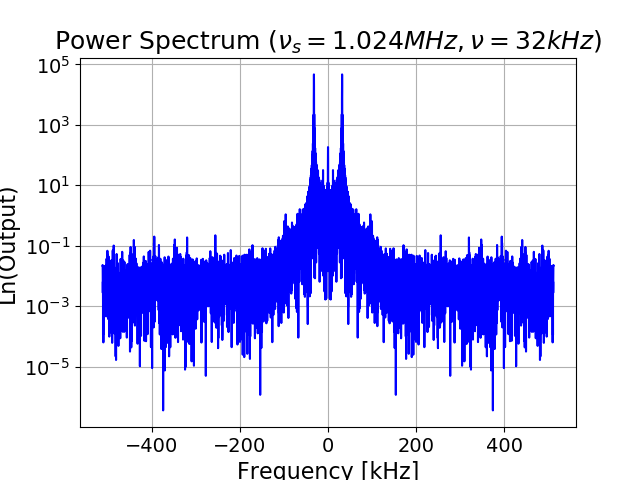

[]

In [133]:
plt.figure(facecolor = 'white')
plt.grid()
plt.title(r'Power Spectrum $(\nu_s = 1.024 MHz, \nu = 32 kHz)$')
plt.xlabel(r'Frequency [kHz]')
plt.ylabel(r'Ln(Output)')
plt.plot(power_data[0], power_data[1], color = 'blue')
plt.semilogy()

<IPython.core.display.Javascript object>


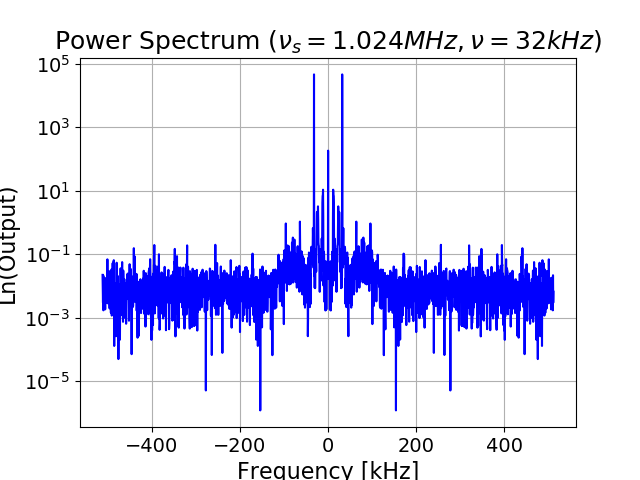

[]

In [136]:
plt.figure(facecolor = 'white')
plt.grid()
plt.title(r'Power Spectrum $(\nu_s = 1.024 MHz, \nu = 32 kHz)$')
plt.xlabel(r'Frequency [kHz]')
plt.ylabel(r'Ln(Output)')
plt.plot(power_data[0], power_data[1], color = 'blue')
plt.semilogy()

## 5.7 Plots (Noise) (From Tyler's Analysis)

In [10]:
noise_data = np.loadtxt('/home/slapshotsd/radiolab/astro121lab/data/noise_data', delimiter=',', skiprows=1)
voltage = noise_data[:,1]
#n,bins,_ = plt.hist(voltage, bins = 37, label = "Binned Data")

In [11]:
#Gaussian function
def gauss_function(x, a,x0, sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

# program
from scipy.optimize import curve_fit
x = bins[1:]
y = n
plt.scatter(x,y) #Plot the curve, the gaussian is quite clear
#plt.plot(x,y,'ok') #Overplot the dots

# Try to fit the result
popt, pcov = curve_fit(gauss_function, x, y)

smoothx = np.linspace(x.min(),x.max(),100000)
smoothy = 2*gauss_function(smoothx,*popt)
plt.plot(smoothx,smoothy)
print(popt)

[2.05757641e+03 1.25676999e-02 8.07342536e-03]


<IPython.core.display.Javascript object>


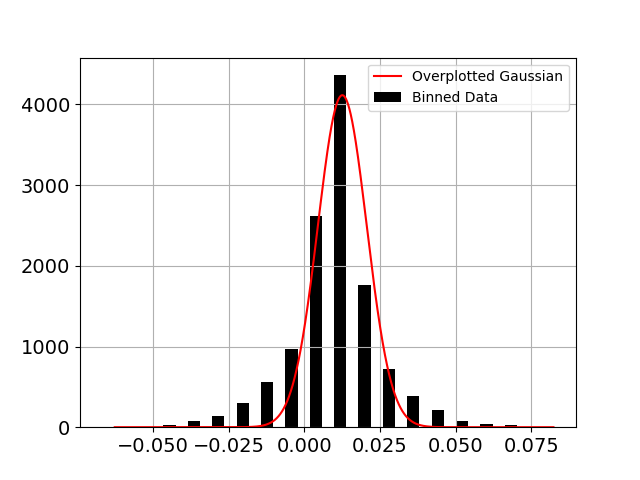

In [32]:
plt.figure()
plt.grid()
plt.hist(voltage, bins = 37, label = "Binned Data", color = 'k')
plt.plot(smoothx,smoothy, label = "Overplotted Gaussian", color = 'red')
plt.legend()
plt.show()

# Experiment 3

## 7.1 Plots (DSB)

In [140]:
def new_new_power_spec(data):
    fourier = ugradio.dft.dft(data, vsamp = 31.25)
    power = np.abs(fourier[1])**2
    return fourier[0], power

In [141]:
df_dsb = pd.read_csv('data/dsb_data')
dsb_plus = df_dsb['Plus']
dsb_minus = df_dsb['Minus']
dsb_power_plus = new_new_power_spec(dsb_plus)
dsb_power_minus = new_new_power_spec(dsb_minus)
dsb_volt_plus = ugradio.dft.dft(dsb_plus, vsamp = 31.25)

<IPython.core.display.Javascript object>


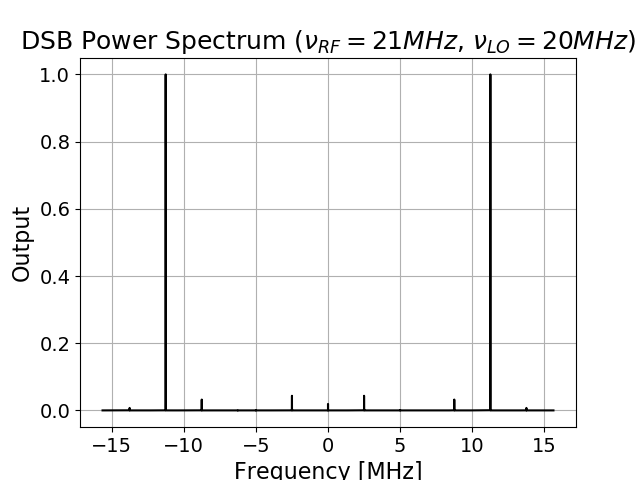

In [148]:
plt.figure()
plt.grid()
plt.plot(dsb_power_plus[0], dsb_power_plus[1]/np.max(dsb_power_plus[1]), color='k')
plt.title(r'DSB Power Spectrum ($\nu_{RF} = 21 MHz$, $\nu_{LO} = 20 MHz$)')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Output')
plt.show()

<IPython.core.display.Javascript object>


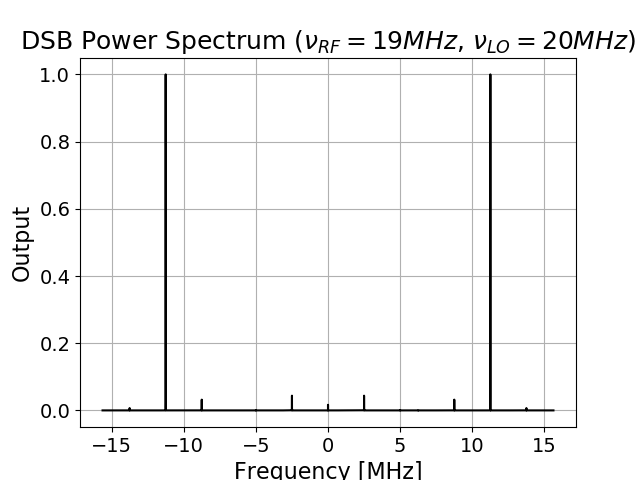

In [157]:
plt.figure()
plt.grid()
plt.plot(dsb_power_minus[0], dsb_power_minus[1]/np.max(dsb_power_minus[1]), color='k')
plt.title(r'DSB Power Spectrum ($\nu_{RF} = 19 MHz$, $\nu_{LO} = 20 MHz$)')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Output')
plt.show()

## 7.3 Plots (SSB)

In [158]:
def csv2numpy(fname):
    csv_data_plus, csv_data_minus = pd.read_csv('data/'+fname)['Plus'], pd.read_csv('data/'+fname)['Minus']
    N_samples = len(csv_data_plus)
    np_data = np.empty((N_samples,2), dtype='complex')
    for i in range(N_samples):
        if not csv_data_plus[i][0] == '(':
            np_data[i, 0] = complex(csv_data_plus[i])
        else:
            np_data[i,0] = complex(csv_data_plus[i][1:-1])
        if not csv_data_minus[i][0] == '(':
            np_data[i, 1] = complex(csv_data_plus[i])
        else:
            np_data[i,1] = complex(csv_data_minus[i][1:-1])
    return np_data

ssb_0 = csv2numpy('ssb_0_data.csv')
ssb_0_plus = ssb_0[:, 0]
ssb_0_minus = ssb_0[:, 1]
ssb_0_power_plus = new_new_power_spec(ssb_0_plus)
ssb_0_power_minus = new_new_power_spec(ssb_0_minus)
ssb_90 = csv2numpy('ssb_90_data.csv')
ssb_90_plus = ssb_90[:, 0]
ssb_90_minus = ssb_90[:, 1]
ssb_90_power_plus = new_new_power_spec(ssb_90_plus)
ssb_90_power_minus = new_new_power_spec(ssb_90_minus)

<IPython.core.display.Javascript object>


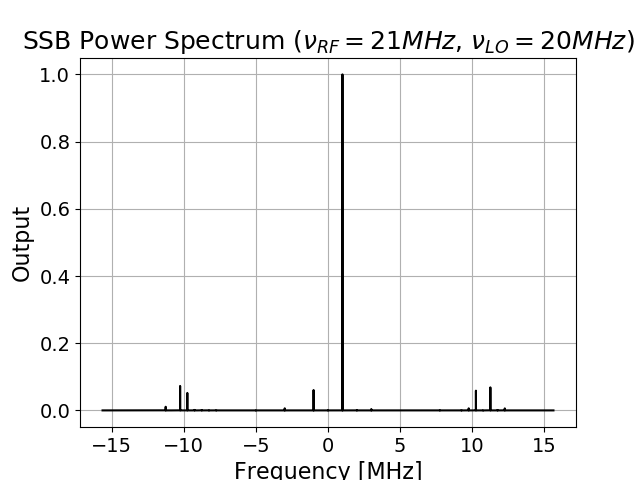

In [162]:
plt.figure()
plt.grid()
plt.plot(ssb_90_power_plus[0], ssb_90_power_plus[1]/np.max(ssb_90_power_plus[1]), color='k')
plt.title(r'SSB Power Spectrum ($\nu_{RF} = 21 MHz$, $\nu_{LO} = 20 MHz$)')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Output')
plt.show()

<IPython.core.display.Javascript object>


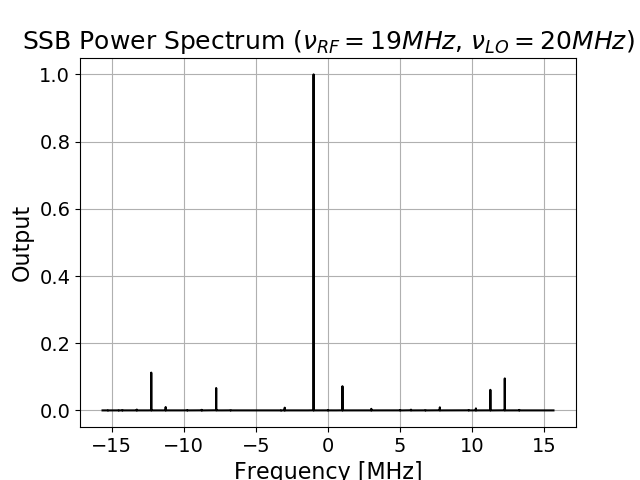

In [164]:
plt.figure()
plt.grid()
plt.plot(ssb_90_power_minus[0], ssb_90_power_minus[1]/np.max(ssb_90_power_minus[1]), color='k')
plt.title(r'SSB Power Spectrum ($\nu_{RF} = 19 MHz$, $\nu_{LO} = 20 MHz$)')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Output')
plt.show()